In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold

In [2]:
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\ttest.csv')

In [3]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df[df.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
df[df.duplicated()].shape

(0, 11)

In [11]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
df[numerical_features].head()

Number of numerical variables: 6


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


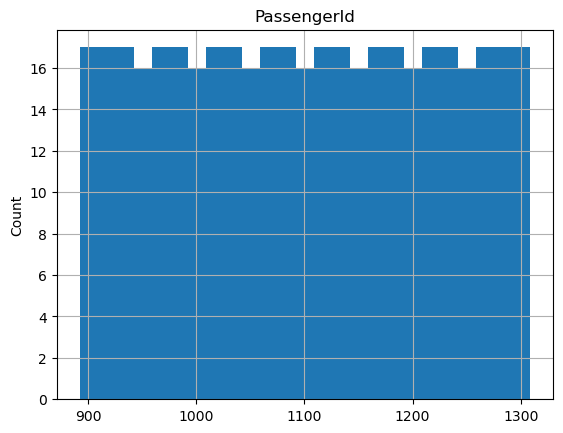

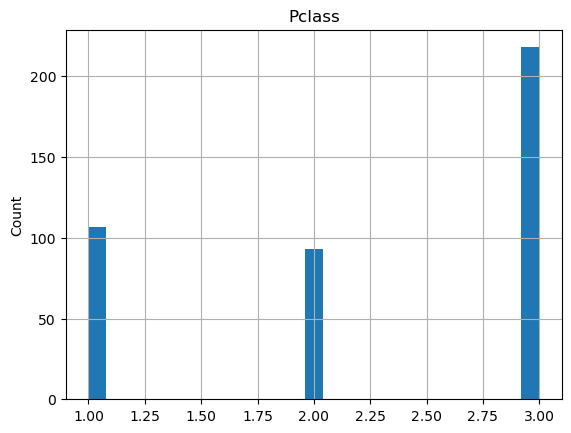

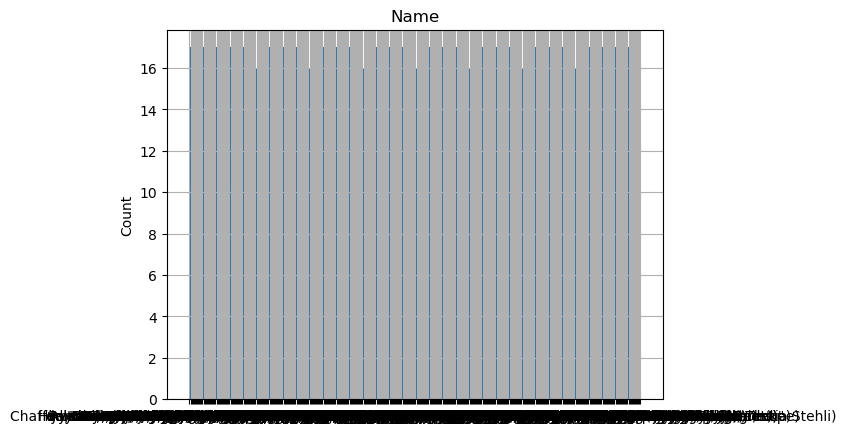

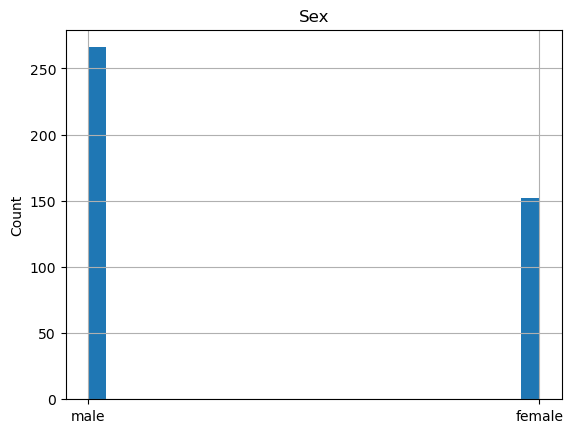

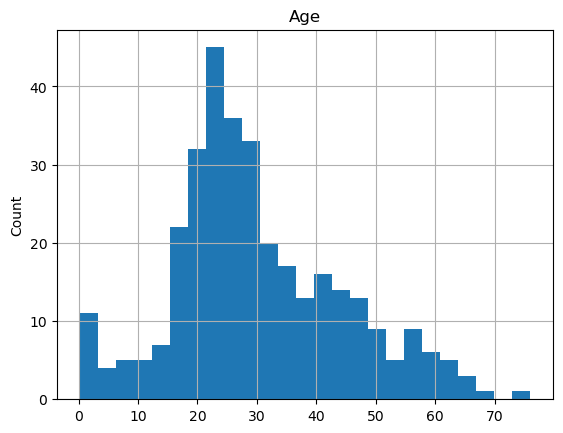

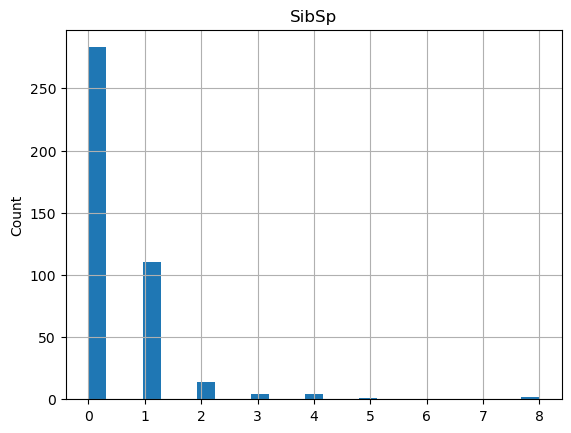

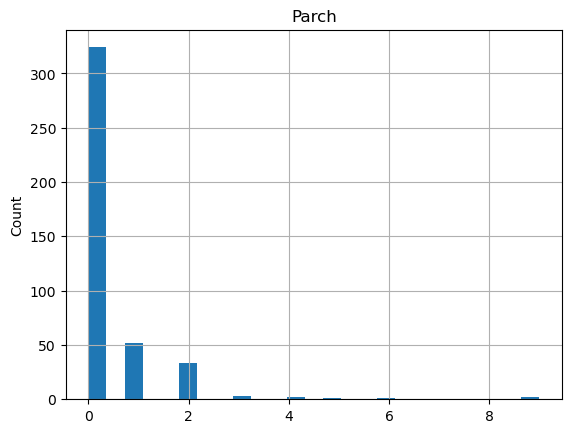

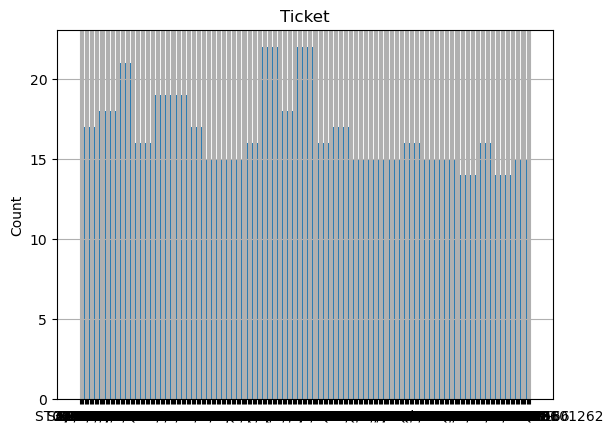

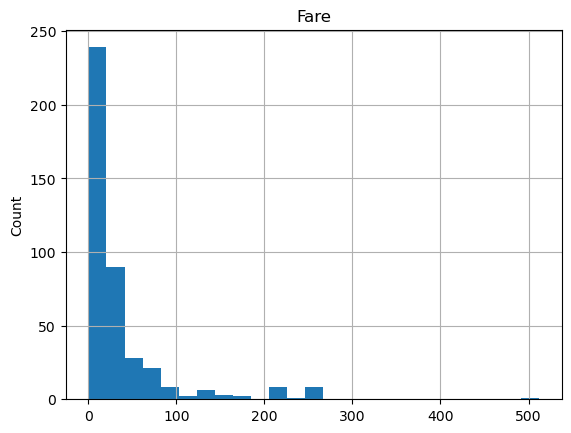

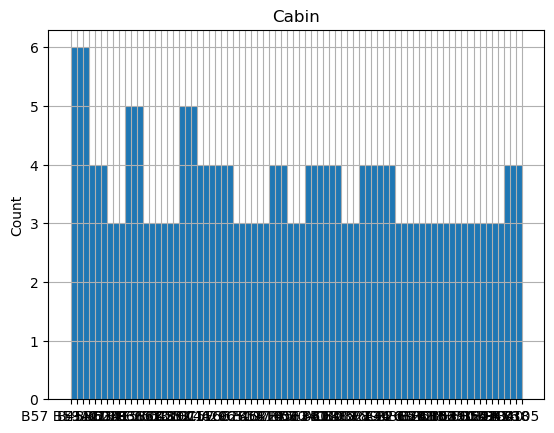

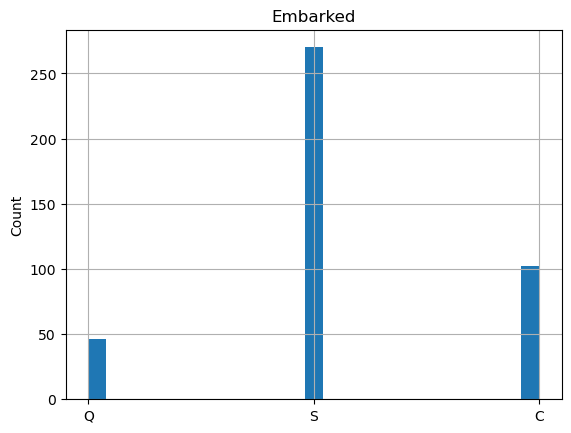

In [15]:
for feature in df:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [16]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


TypeError: Horizontal orientation requires numeric `x` variable.

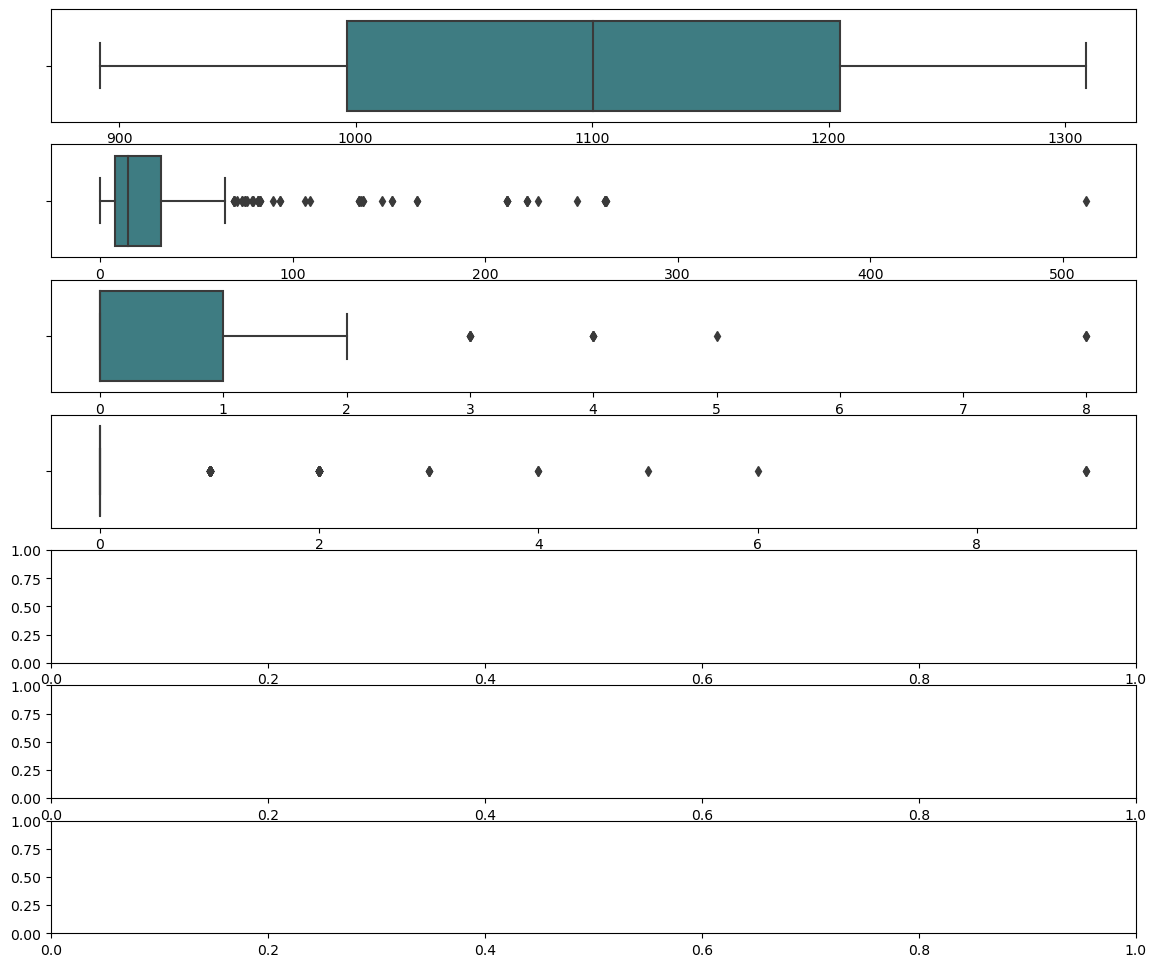

In [18]:
ot=df.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='PassengerId',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Fare',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='SibSp',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Parch',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Ticket',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Fare',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Pclass',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

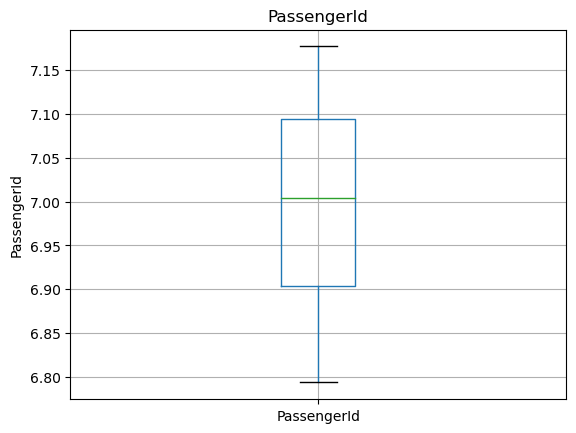

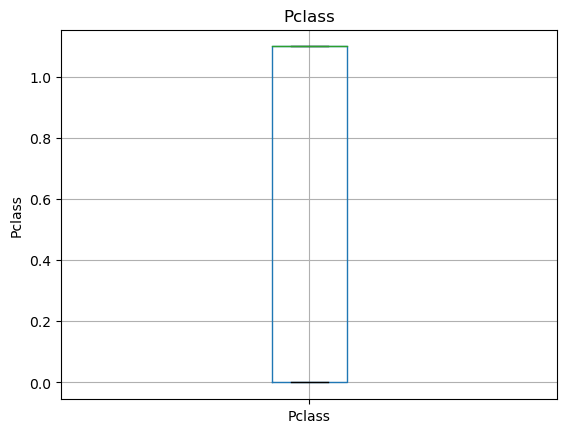

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [20]:
for feature in df:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

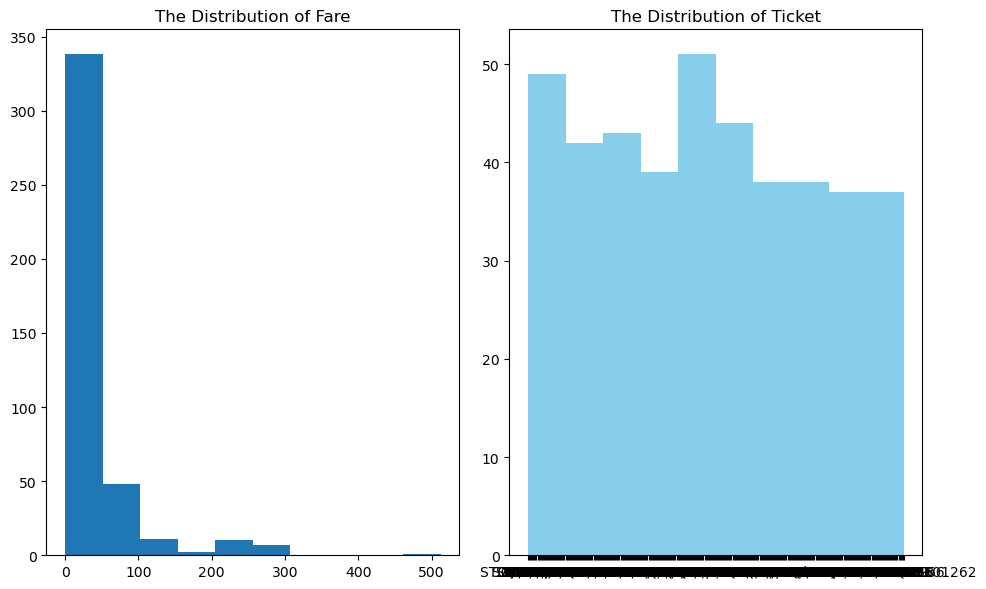

In [23]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df['Fare'])
ra1.set_title('The Distribution of Fare')

ra2.hist(df['Ticket'], color = 'skyblue')
ra2.set_title('The Distribution of Ticket')

plt.tight_layout() 
plt.show()

In [26]:
df[['Ticket','Fare']].describe()

,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


In [29]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
df[categorical_features].head()


Number of Categorical Features: 5 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S


In [30]:
for feature in df:
    print("{} number of unique categories in feature named {}".format(len(df[feature].unique()),feature))

418 number of unique categories in feature named PassengerId
3 number of unique categories in feature named Pclass
418 number of unique categories in feature named Name
2 number of unique categories in feature named Sex
80 number of unique categories in feature named Age
7 number of unique categories in feature named SibSp
8 number of unique categories in feature named Parch
363 number of unique categories in feature named Ticket
170 number of unique categories in feature named Fare
77 number of unique categories in feature named Cabin
3 number of unique categories in feature named Embarked


In [36]:
for feature in df.columns:
    if df['Name'].dtypes == 'object':# in pandas it is object
        unique_cat = len(df['Name'].unique())
        print("Feature '{Name}' has {unique_cat} unique categories".format(Name='Name', unique_cat=unique_cat))
        print(df['Name'].value_counts())
        print()

Feature 'Name' has 418 unique categories
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64

Feature 'Name' has 418 unique categories
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64

Feature 'Name' has 418 unique categories
Name
Kelly, Mr. James               1
Carr, Miss. Jeannie    

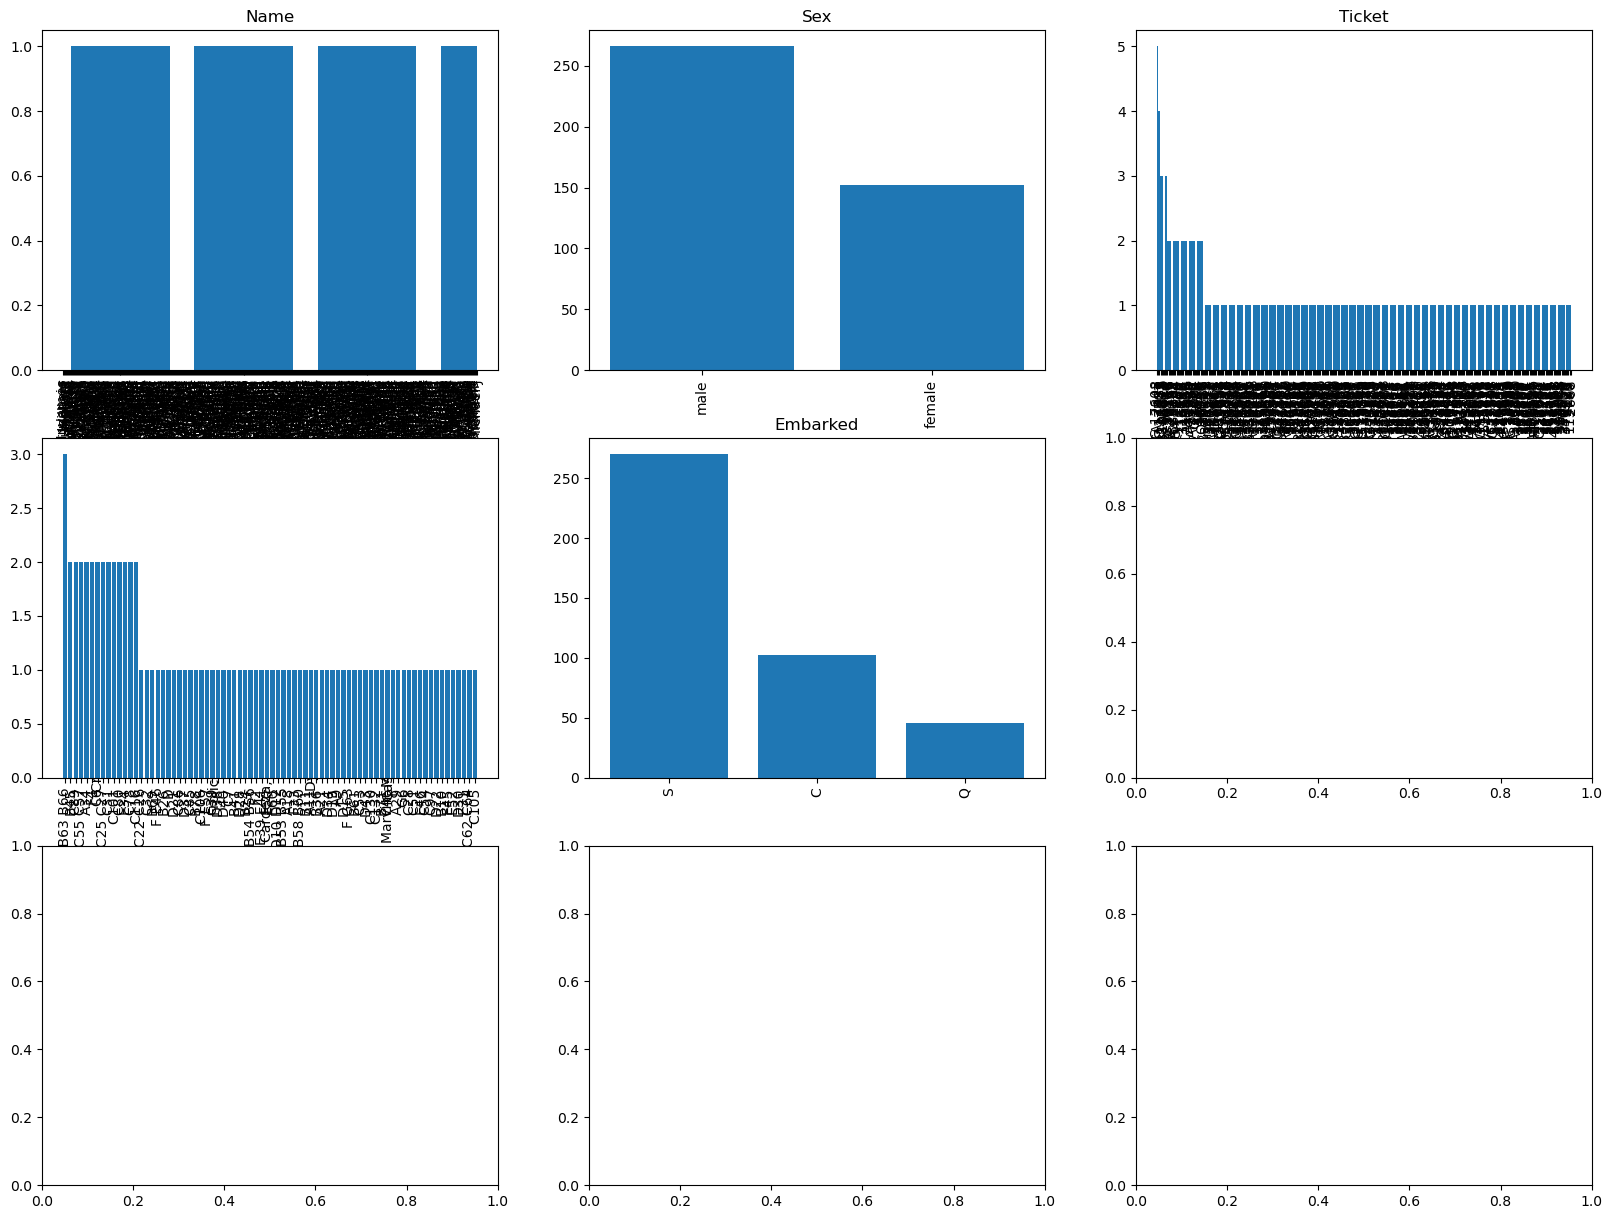

In [37]:
cat_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

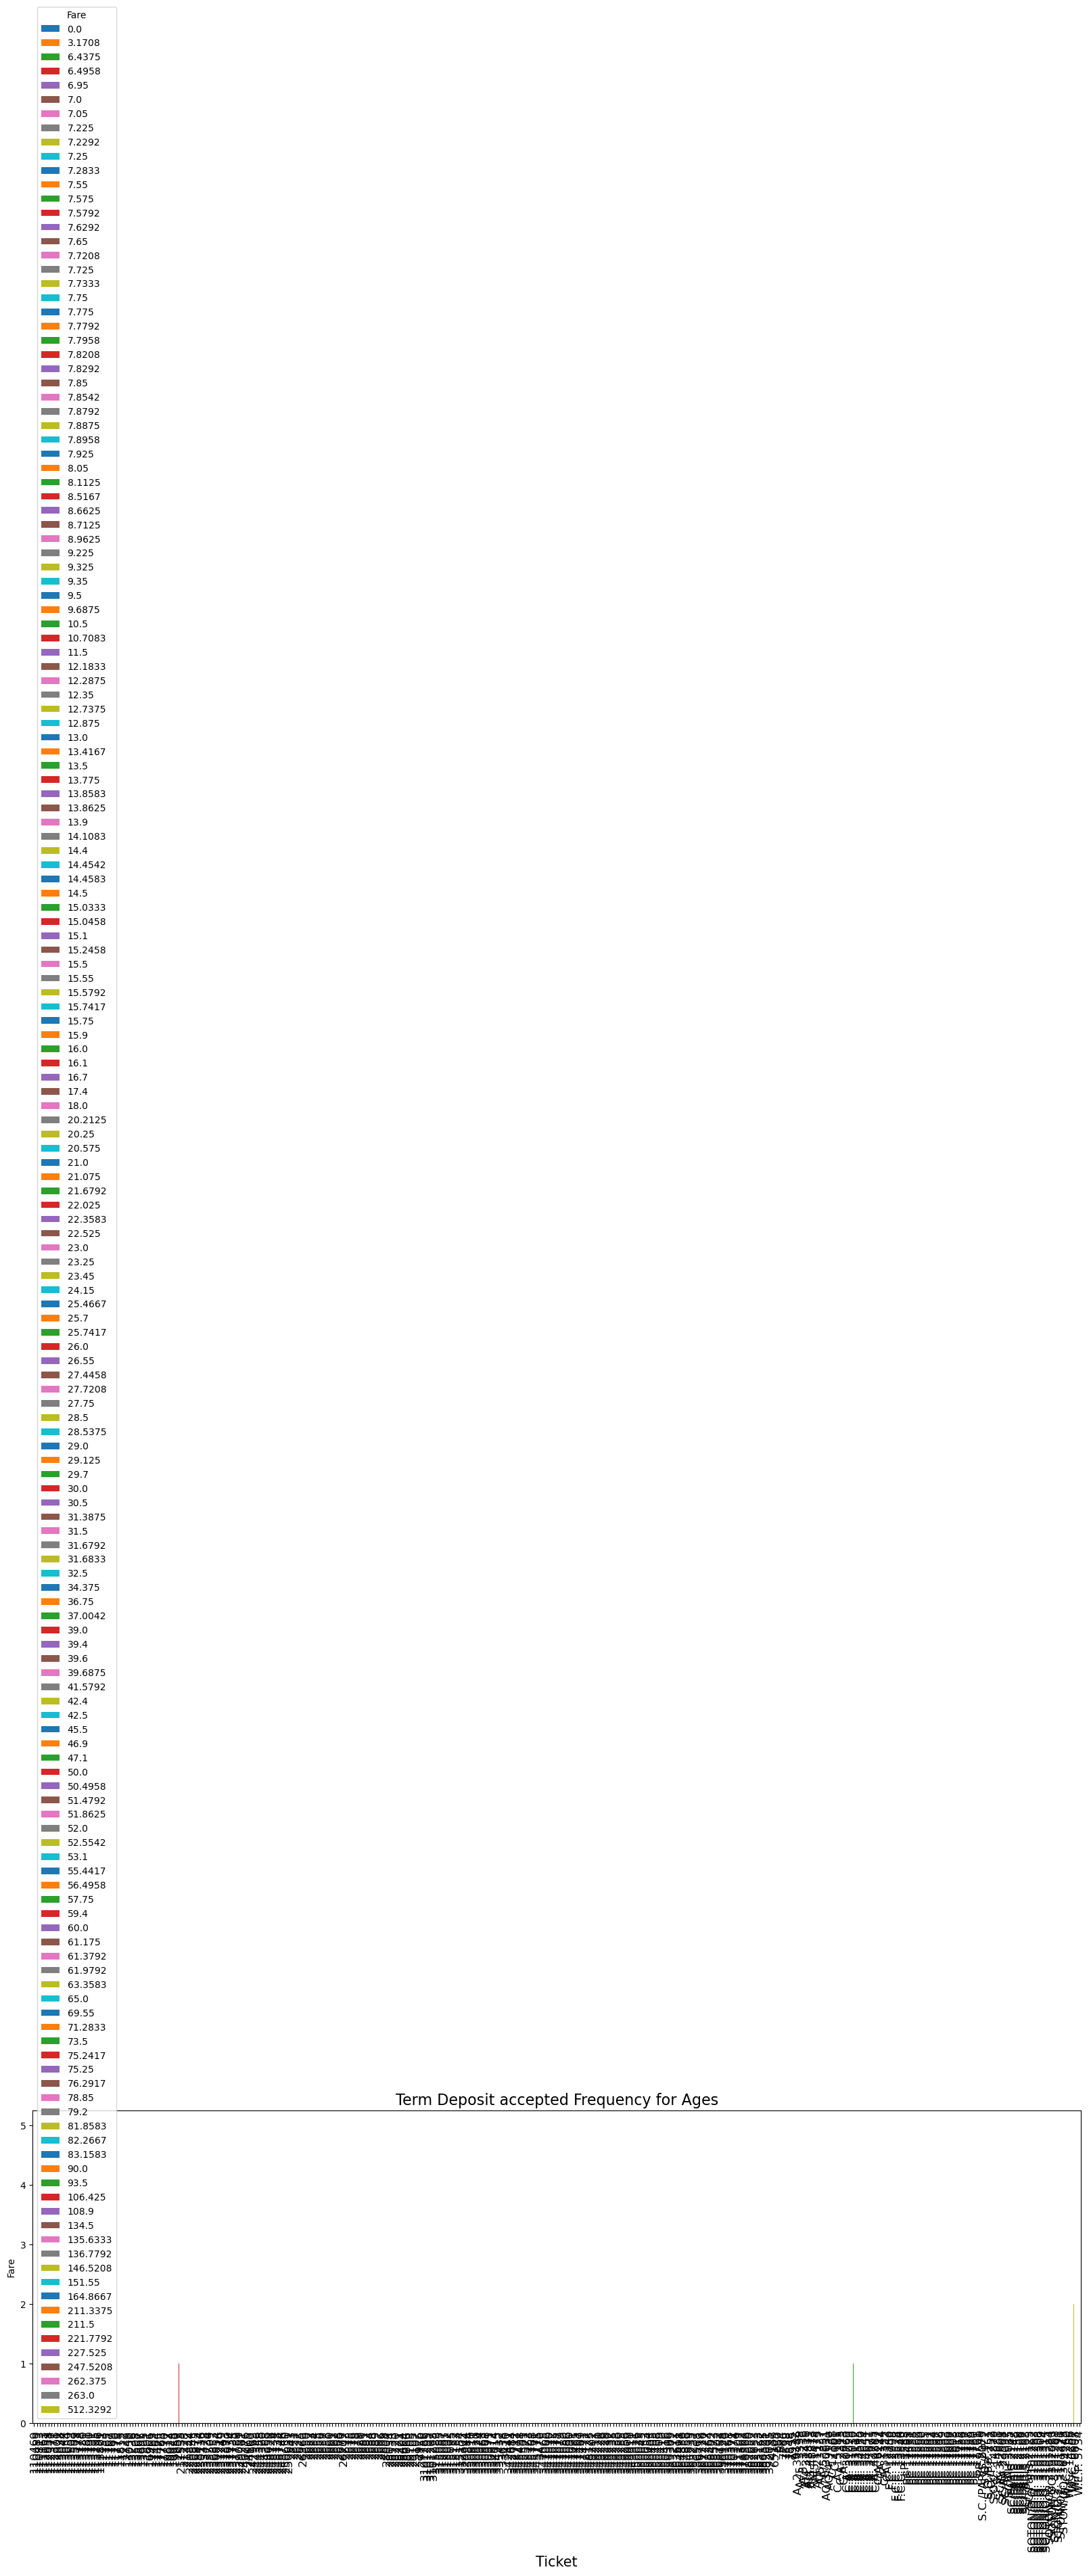

In [45]:
pd.crosstab(df.Ticket,df.Fare).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Ticket', fontsize = 15)
plt.ylabel('Fare')
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
df_standard_scaled = df.copy()
column_name= ['PassengerId','Age','Fare']
features = df_standard_scaled[column_name]
rest = [columns for columns in df.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = column_name)
df_standard_scaled[rest] = df[rest]
df_standard_scaled.head()

,PassengerId,Age,Fare,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,-1.727912,0.298549,-0.497811,3,"Kelly, Mr. James",male,0,0,330911,NaN,Q
1,-1.719625,1.181328,-0.512660,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,NaN,S
2,-1.711337,2.240662,-0.464532,2,"Myles, Mr. Thomas Francis",male,0,0,240276,NaN,Q
3,-1.703050,-0.231118,-0.482888,3,"Wirz, Mr. Albert",male,0,0,315154,NaN,S
4,-1.694763,-0.584229,-0.417971,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,NaN,S
